In [1]:
import pandas as pd
import yfinance as yf

In [2]:
# My excel link is different from yours, mines prob wrong, its ok for now i dont think it changes anything
tickers = pd.read_excel('https://www.ssga.com/us/en/institutional/ic/library-content/products/fund-data/mf/us/holdings-monthly-us-en-svspx.xlsx', header = 2).Ticker.dropna().to_list()
data = yf.download(tickers = tickers, period = '1y')['Adj Close']
sp500 = data.dropna(how= 'all', axis= 1)
sp500


[*********************100%%**********************]  504 of 504 completed


4 Failed downloads:
['BRK.B', 'R_SP50', 'K.WI']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=1y)')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-28,151.231583,13.83,143.418350,152.278244,95.300003,103.323029,58.020000,286.055237,328.970001,160.986725,...,77.590897,67.198372,106.184631,29.993979,108.202744,124.114693,116.775375,269.000000,47.835228,146.790985
2022-11-29,149.881119,14.14,140.385315,152.057205,95.379997,102.940674,58.980000,283.476196,326.779999,160.868927,...,79.664612,66.675423,106.890533,29.747803,108.469269,123.712265,118.095261,266.820007,48.597092,146.513519
2022-11-30,153.892776,14.43,147.207184,154.921463,102.139999,105.470078,59.910000,296.223663,344.929993,168.741089,...,83.008369,68.002159,107.664124,29.797039,110.907562,126.283882,119.186905,270.279999,49.349430,152.746674
2022-12-01,155.024780,13.98,147.485626,155.354004,101.269997,105.813217,59.759998,298.093903,344.109985,168.319000,...,83.385406,67.973106,107.141945,30.958986,112.338943,126.804100,122.412201,268.820007,49.511318,155.224060
2022-12-02,154.577942,13.97,146.988403,157.305176,101.000000,105.970070,60.599998,295.436157,341.529999,166.258408,...,84.486755,66.956268,106.232979,31.195312,112.072403,127.285049,122.035088,274.859985,49.758926,155.996994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20,113.980003,12.40,191.449997,138.309998,129.699997,101.199997,84.459999,330.899994,612.700012,183.820007,...,87.169998,60.060001,104.500000,29.940001,100.209999,127.516830,112.500000,220.539993,35.779999,176.059998
2023-11-21,123.919998,12.13,190.639999,138.729996,126.820000,101.910004,86.129997,330.260010,610.989990,181.250000,...,86.860001,60.020000,104.459999,30.990000,101.019997,127.636276,112.900002,222.410004,34.310001,178.729996
2023-11-22,123.989998,12.31,191.309998,138.470001,129.039993,102.699997,85.949997,333.130005,619.719971,182.669998,...,87.529999,60.430000,104.010002,31.360001,102.220001,128.332977,113.830002,225.860001,34.410000,179.350006


<Axes: xlabel='Date'>

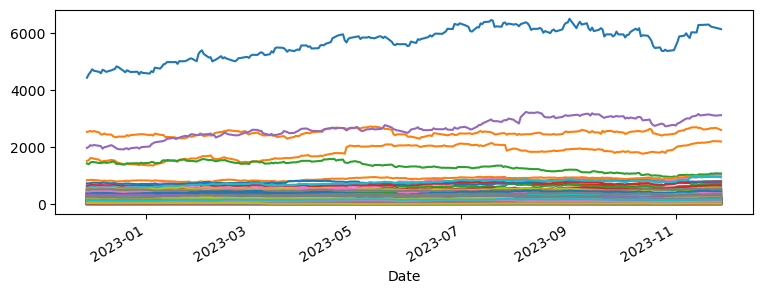

In [3]:

# I graphed each stock in sp500, to visualize the lines were analyzing
# Our trend line would follow Y = mx+b, we need the slope for each stock
sp500.plot(figsize = (9,3),legend= None) 

In [4]:
# Slope is our (y2-y1)[change of price] 
# divided by (x1-x2)[change of 1 year]
open_price = sp500.iloc[0] # first data entry
close_price = sp500.iloc[-1] # most recent data entry
price_difference = close_price - open_price
# Since our change of time is 1 year, im just going to divide by count of rows
slope = price_difference / len(sp500) * 100
slope

A      -10.446845
AAL     -0.657370
AAPL    18.474758
ABBV    -5.254282
ABNB    13.426294
          ...    
YUM      1.424426
ZBH     -1.169474
ZBRA   -14.940239
ZION    -5.352680
ZTS     12.748609
Length: 500, dtype: float64

In [5]:
# Im assuming 260 day low refers to trading days in year
# Since we have roughly 251 rows of data, well get the low of what we have already
# Take the difference with our current price, then divide over the low
present_low_change = close_price - sp500.min()
percent_above_260 = (present_low_change / sp500.min()) * 100
percent_above_260 

A       23.564302
AAL     11.538464
AAPL    52.656249
ABBV     7.191623
ABNB    56.382596
          ...    
YUM     10.360422
ZBH     10.825540
ZBRA    16.925094
ZION    79.835912
ZTS     26.637809
Length: 500, dtype: float64

In [6]:
# Close - 4wk low , divided by 4week high - 4week low)
# subtract 
# Close - 52wk low , divided by 52week high - 52week low)
# notice the equation is same
# time period changes, im just gonna run a for loop with the formula
# and change the times for 4wk (20 data entries) and 52wk(all data entries)
data_indexes = (20, len(sp500))
oscillator_ratios = []
for index in data_indexes:
    close_minus_low= close_price - sp500[-index:].min()
    ratio = close_minus_low / (sp500[-index:].max() - sp500[-index:].min())
    oscillator_ratios.append(ratio)

oscillator = (oscillator_ratios[0] - oscillator_ratios[1]) *100
oscillator


#Note : he doesnt want us to use for loops but this one only loops twice, 
# and I only did it because the formula is redundant so I didnt want to write it twice 

A       51.856420
AAL     65.260162
AAPL     0.808145
ABBV    -3.096524
ABNB    29.415446
          ...    
YUM     45.315995
ZBH     73.874963
ZBRA    77.159026
ZION    27.787556
ZTS     21.507171
Length: 500, dtype: float64

In [7]:
# 39 week returns sounds simple
# im going to use 5 data entries per week so were looking at 39 * 5, 195 data entries

price_39_weeks_ago = sp500.iloc[-195] # 195 data entries away (39 weeks | 5 entries per week)
price_difference_39_weeks = close_price - price_39_weeks_ago
price_difference_39_weeks # I think this is all we need for the return, right?



A      -22.429466
AAL     -4.180000
AAPL    37.856308
ABBV    -7.727249
ABNB    -2.600006
          ...    
YUM     -1.911453
ZBH    -11.409363
ZBRA   -91.079987
ZION   -14.961830
ZTS      7.914490
Length: 500, dtype: float64

In [8]:
# 51 week volume price trend 
# Multiply weekly avg volume by percent change in price each of the past 51 weeks

# Can we just use std for volume?
# vpt = sum of (the weekly volumes * weekly price change )

In [9]:

sp500.index = pd.to_datetime(sp500.index)

# Just found out i can Resample to weekly frequency and calculate the mean and volume that way -_-. 
# 'W' stands for week
weekly_means = sp500.resample('W').mean()
weekly_std = sp500.resample('W').std()

vpt = weekly_means.pct_change() * weekly_std # Not sure if correct formula 
volume_price_trend = vpt.sum() 




In [10]:
# Made a neat table that can help with 
# calculations and saving our momentum factors


test = sp500.copy().transpose()

volume = sp500.std()
test['Volume'] = volume
means = sp500.mean()
test['Mean'] = means



new_table = test[['Volume', 'Mean']]
new_table # Needs a name



Date,Volume,Mean
A,15.473199,129.336713
AAL,1.870509,14.537371
AAPL,18.722855,166.871372
ABBV,7.602290,146.230616
ABNB,15.683602,120.173526
...,...,...
YUM,5.000280,128.730984
ZBH,10.693975,125.112166
ZBRA,33.562720,270.682032
ZION,8.392618,35.736832


In [11]:
new_table['Slope 52 Week Trend-Line'] = slope
new_table['Percent above 260'] = percent_above_260
new_table['4/52 Week Oscillator'] = oscillator
new_table['39 Week Return'] = price_difference_39_weeks
new_table['51 Week Volume Price Trend'] = volume_price_trend

/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_36132/3713454937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Slope 52 Week Trend-Line'] = slope
/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_36132/3713454937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Percent above 260'] = percent_above_260
/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_36132/3713454937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [12]:
new_table

Date,Volume,Mean,Slope 52 Week Trend-Line,Percent above 260,4/52 Week Oscillator,39 Week Return,51 Week Volume Price Trend
A,15.473199,129.336713,-10.446845,23.564302,51.856420,-22.429466,-0.190648
AAL,1.870509,14.537371,-0.657370,11.538464,65.260162,-4.180000,0.110067
AAPL,18.722855,166.871372,18.474758,52.656249,0.808145,37.856308,0.519361
ABBV,7.602290,146.230616,-5.254282,7.191623,-3.096524,-7.727249,-0.292303
ABNB,15.683602,120.173526,13.426294,56.382596,29.415446,-2.600006,1.417115
...,...,...,...,...,...,...,...
YUM,5.000280,128.730984,1.424426,10.360422,45.315995,-1.911453,-0.069471
ZBH,10.693975,125.112166,-1.169474,10.825540,73.874963,-11.409363,-0.296802
ZBRA,33.562720,270.682032,-14.940239,16.925094,77.159026,-91.079987,-3.714988
ZION,8.392618,35.736832,-5.352680,79.835912,27.787556,-14.961830,-0.268049
